##### <a href='#overview'>1. overview</a>
##### <a href='#library'>2. Importing Libraries and Reading the Dataset</a>
##### <a href='#DataAnalysis'>3. Data Analysis</a>
* <font color='skyblue'>Visualizing Date</font>
* <font color='skyblue'>Data Preprocessing</font>
##### <a href='#Regression Model'>4. Regression Model</a>
* <font color='skyblue'>Linear Regression</font>
* <font color='skyblue'>Polynomial Regression - 2nd degree</font>
* <font color='skyblue'>Ridge Regression</font>
* <font color='skyblue'>Lasso Regression</font>
* <font color='skyblue'>Support Vector Regression</font>
* <font color='skyblue'>Decision Tree Regression</font>
* <font color='skyblue'>Random Forest Regression</font>
##### <a href='#Measuring the Error'>5. Measuring the Error</a>
* <a href='#Visualizing Models Performance'>Visualizing Models Performance</a>
##### <a href='#Conclusion'>6. Conclusion</a>

## <a id='overview'>1. overview</a>

<font color='orange'>

__Columns__:

* __CRIM__: Per capita crime rate by town
* __ZN__: Proportion of residential land zoned for lots over 25,000 sq. ft
* __INDUS__: Proportion of non-retail business acres per town
* __CHAS__: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* __NOX__: Nitric oxide concentration (parts per 10 million)
* __RM__: Average number of rooms per dwelling
* __AGE__: Proportion of owner-occupied units built prior to 1940
* __DIS__: Weighted distances to five Boston employment centers
* __RAD__: Index of accessibility to radial highways
* __PTRATIO__: Pupil-teacher ratio by town
* __B__: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
* __LSTAT__: Percentage of lower status of the population
* __MEDV__: Median value of owner-occupied homes in $1000s

</font>

## <a id='library'>2. Importing Libraries and Reading the Dataset</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
# from IPython.core.display import display, HTML
from IPython.display import clear_output
sns.set_style('darkgrid')

In [2]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv"
dataset = pd.read_csv(data_url)
dataset.columns = dataset.columns.str.upper()

print('shape of df:',dataset.shape)
print('shape of target:', dataset['MEDV'].shape)
dataset.head()

shape of df: (506, 14)
shape of target: (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## <a id='DataAnalysis'>3. Data Analysis </a>
### <font color='orange'>Visualizing Data</font>

In [3]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


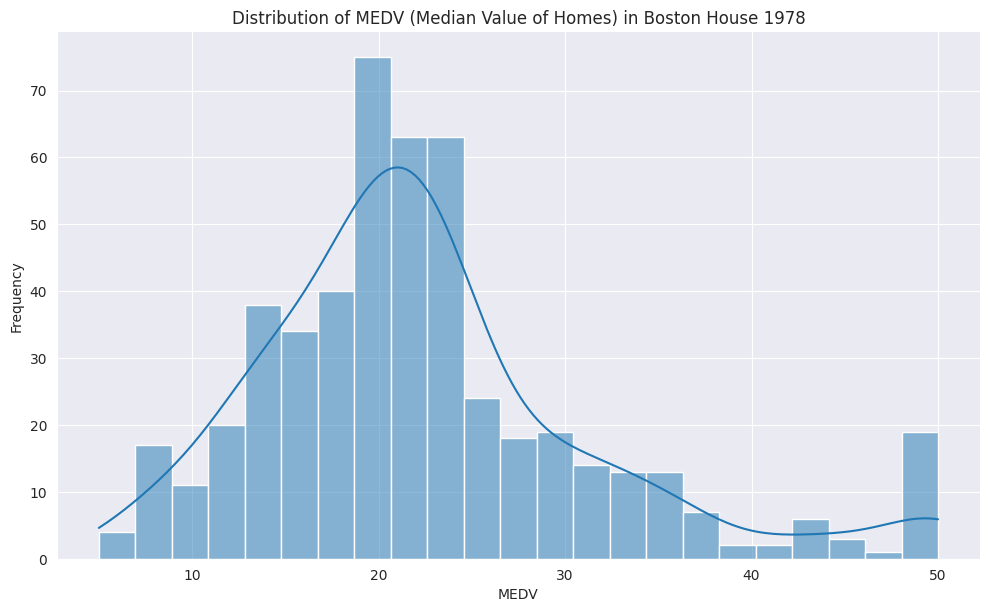

In [5]:
# plt.figure(figsize=(20, 6))
sns.displot(dataset['MEDV'], kde=True, height=6, aspect=10/6)
plt.title('Distribution of MEDV (Median Value of Homes) in Boston House 1978')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

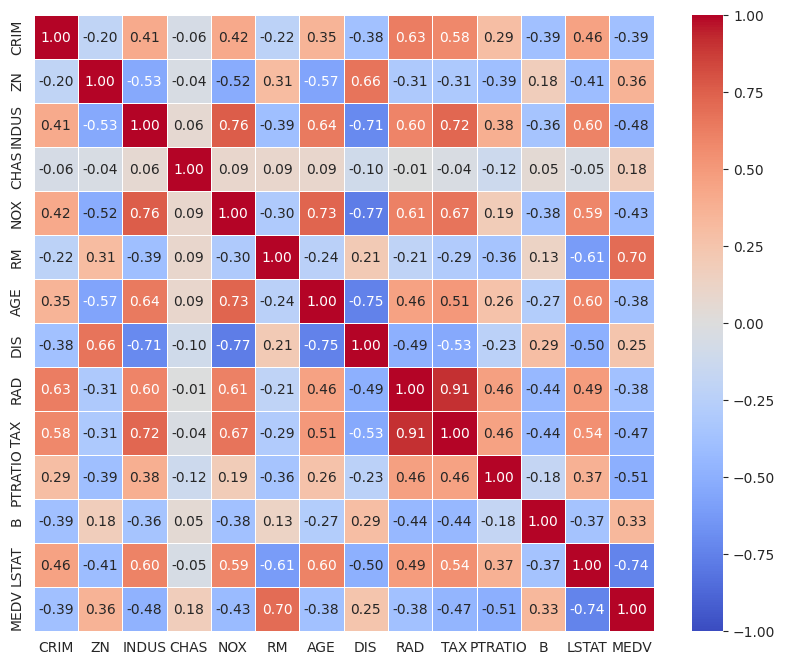

In [6]:
corr_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.show()

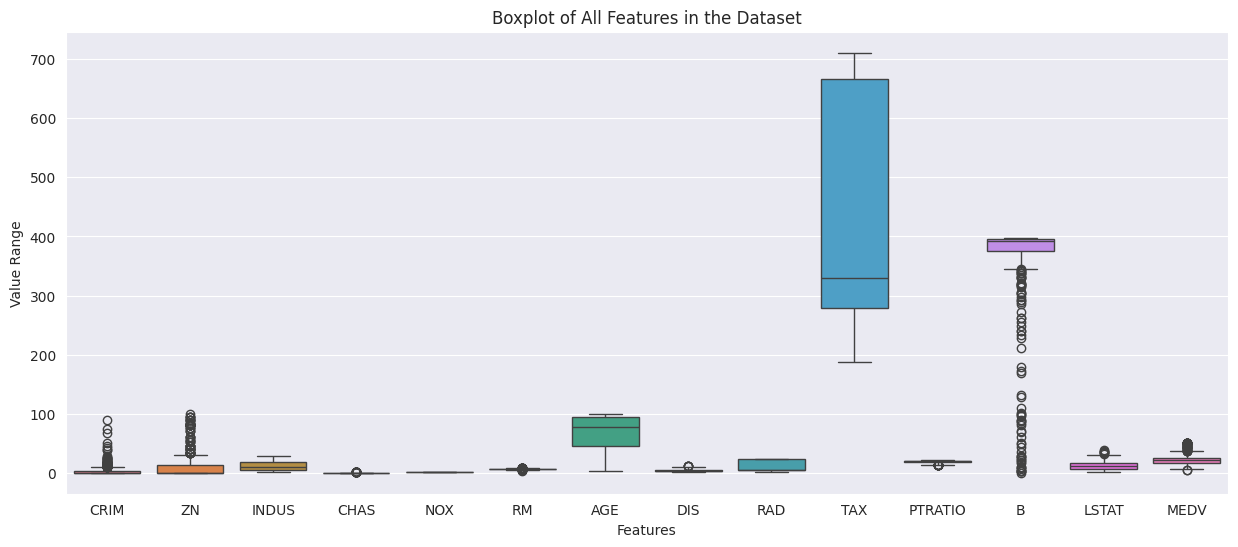

In [7]:
def plot_boxplot(data):
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=data)

    plt.title('Boxplot of All Features in the Dataset')
    plt.xlabel('Features')
    plt.ylabel('Value Range')

    plt.show()

plot_boxplot(data=dataset)

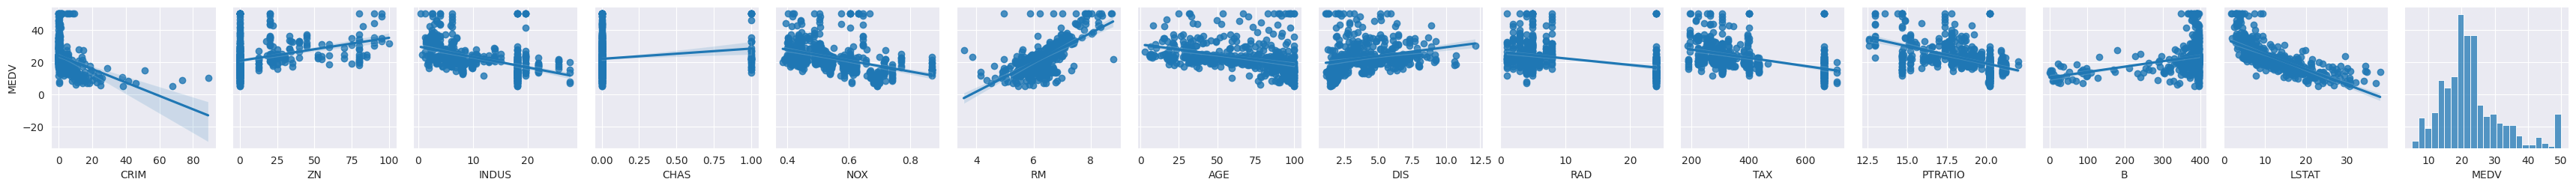

In [8]:
sns.pairplot(dataset, x_vars=dataset.columns, y_vars=['MEDV'], kind='reg')

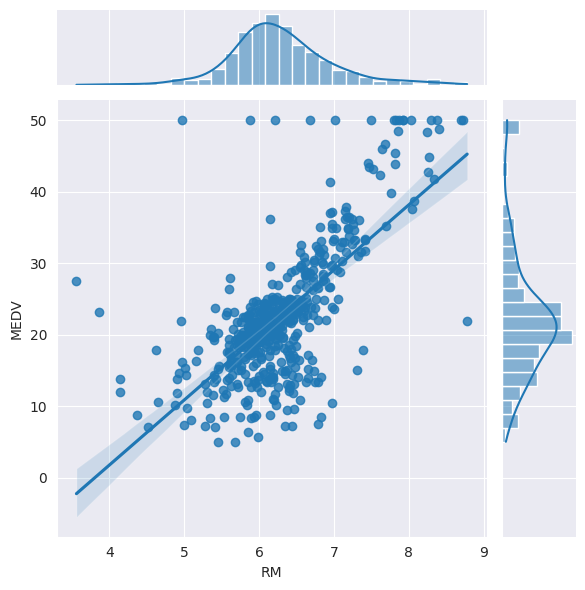

In [9]:
sns.jointplot(x=dataset.RM,y=dataset.MEDV,kind='reg')

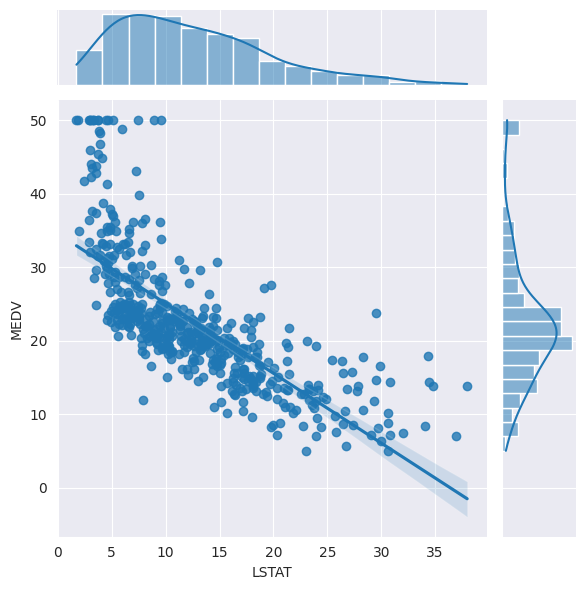

In [10]:
sns.jointplot(x=dataset.LSTAT,y=dataset.MEDV,kind='reg')

### <font color='orange'>Data Preprocessing</font>

In [11]:
y = dataset['MEDV']
X = dataset.drop('MEDV', axis=1)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### <font color='orange'>Data Scaling</font>

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

minMaxScaler = MinMaxScaler().fit(X)
X_processed = minMaxScaler.transform(X)

df_processed = pd.DataFrame(X_processed, columns=X.columns)
df_processed.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


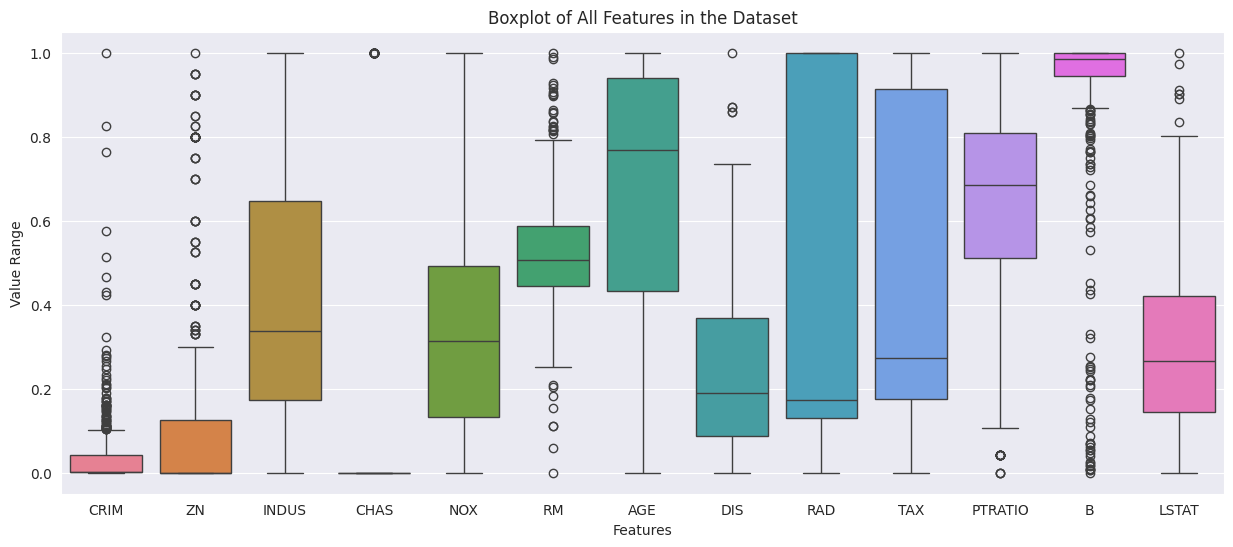

In [13]:
plot_boxplot(df_processed)

#### Split the dataset (train_test_split)
* Split the data into Training set & Testing set
* Training set for training
* Testing set for performance evaluation

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=1)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (404, 13)
Shape of X_test:  (102, 13)


### Step 2 & 3: Training & evaluation
Try different Regression models

https://scikit-learn.org/stable/supervised_learning.html

![Profile pic](https://raw.githubusercontent.com/learn10kYear/learn-pandas/5694cc873981e45dee5b57265c8e85d3be4c7912/sklearn2/decision_tree_general.png)

![Profile pic](https://raw.githubusercontent.com/learn10kYear/learn-pandas/5694cc873981e45dee5b57265c8e85d3be4c7912/sklearn2/random_forest.png)

In [29]:
X_train.shape

(404, 13)

In [30]:
y_train.shape

(404,)

                                        RMSE    R-squared
 1. RandomForestRegressor               2.88    0.92
 2. DecisionTreeRegressor               4.18    0.82
 3. KNeighborsRegressor                 4.64    0.78
 4. LinearRegression                    4.84    0.76


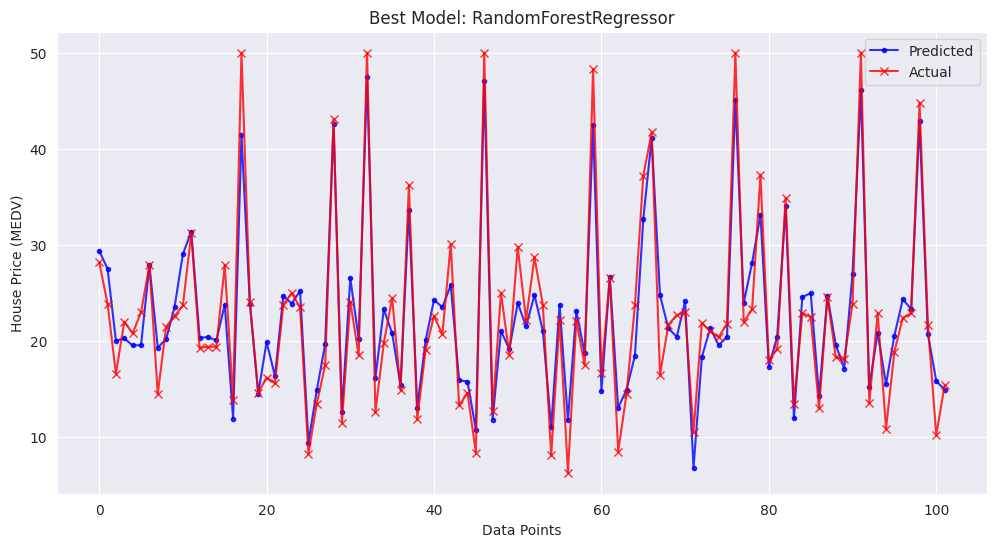

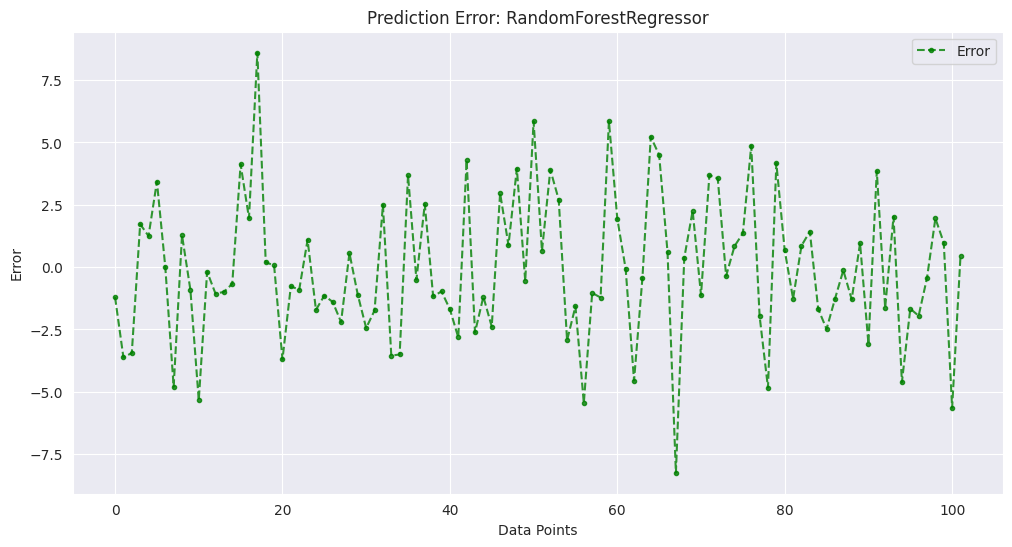

In [31]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import collections, operator

# 1. 封裝訓練和評估流程
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  # 訓練模型
    pred = model.predict(X_test)  # 預測
    mse = mean_squared_error(y_test, pred)  # 計算均方誤差
    rmse = np.sqrt(mse)  # 計算 RMSE
    r2 = r2_score(y_test, pred)  # 計算 R-squared
    return RunResult(model, rmse, pred, r2)

RunResult = collections.namedtuple("RunResult", "model error pred r2")

# 3. 定義模型列表
model_list = [
    LinearRegression(), 
    KNeighborsRegressor(),
    DecisionTreeRegressor(), 
    RandomForestRegressor(n_estimators=100),
]

# 4. 訓練模型並保存結果
result_list = [evaluate_model(model, X_train, y_train, X_test, y_test) for model in model_list]

# 5. 根據 RMSE 排序並輸出結果
result_list.sort(key=operator.attrgetter('error'))

space = ' '
print(f'{space*40}RMSE{space*4}R-squared')
for i, result in enumerate(result_list):
    print(f'{i+1:2}. {type(result.model).__name__:30}    {result.error:6.2f}    {result.r2:.2f}')

# 6. 可視化最佳模型的預測結果
best_model = result_list[0].model
best_pred = result_list[0].pred

# 可視化實際值和預測值
x_index = np.arange(0, len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(x_index, best_pred, marker='.', alpha=0.8, color='b', label='Predicted')
plt.plot(x_index, y_test, marker='x', alpha=0.8, color='r', label='Actual')
plt.title(f'Best Model: {type(best_model).__name__}' )
plt.ylabel('House Price (MEDV)')
plt.xlabel('Data Points')
plt.legend()
plt.show()

# 7. 可視化預測誤差
dist = y_test - best_pred  # 計算預測誤差

plt.figure(figsize=(12, 6))
plt.plot(x_index, dist, marker='.', alpha=0.8, linestyle='--', color='g', label='Error')
plt.title(f'Prediction Error: {type(best_model).__name__}')
plt.ylabel('Error')
plt.xlabel('Data Points')
plt.legend()
plt.show()


### cross-validated RMSE

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) # Warning: cv have to run 5 times!

rmse_cv = np.sqrt(-scores) # For sklearn, the higher the score, the better the performance. Error is the opposite, so the score is negative.
print(f'RMSE scores: {rmse_cv}')
print(f'RMSE mean: {rmse_cv.mean():.2f}')
print(f'RMSE std: {rmse_cv.std():.2f}')

# or you can put the cross_val_score to the previous for loop to evaluate the Cross-validated MSE for each algorithms

RMSE scores: [3.09775992 3.55711701 3.13016385 3.38949675 3.21266226]
RMSE mean: 3.28
RMSE std: 0.17


In [33]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
cv_results = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
#     print(len(cv_results))
print(cv_results.keys())
print('Fit time:' + str(cv_results['fit_time']))  # fit time of each split 
print('Score time:' + str(cv_results['score_time'])) # score time of each split
rmse_cv = np.sqrt(-cv_results['test_score'])
print('Test score:' + str(rmse_cv))

dict_keys(['fit_time', 'score_time', 'test_score'])
Fit time:[0.10679126 0.10972929 0.10188317 0.09988499 0.09712839]
Score time:[0.00065517 0.00076222 0.00070357 0.00071311 0.00068069]
Test score:[3.0720594  3.04302888 3.21169489 3.92033659 2.91470877]


In [34]:
result_list = [] # clear the result list first
for model in model_list:
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10) # Warning: cv have to run 5 times!
    rmse_cv = np.sqrt(-scores) 
    result_list.append(RunResult(model, rmse_cv.mean(), None, 0))
    
# sort the results by error and then print the result
result_list.sort(key=operator.attrgetter('error'))

space=' '
print(f'{space*40}RMSE{space*4}')
for i, result in enumerate(result_list):
    print(f'{i+1:2}. {type(result.model).__name__:30}    {result.error:6.2f}')

                                        RMSE    
 1. RandomForestRegressor               3.12
 2. DecisionTreeRegressor               4.04
 3. LinearRegression                    4.82
 4. KNeighborsRegressor                 4.97


Text(0.5, 1.0, 'Distribution of Errors')

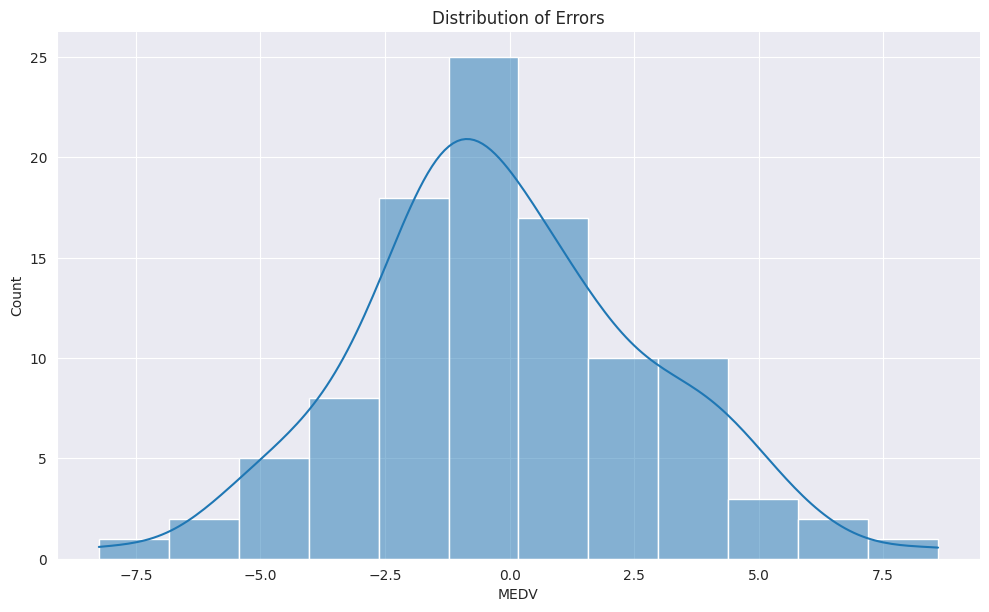

In [35]:
# Errors distribution
dist = y_test - best_pred
# plt.hist(dist)
sns.displot(dist, kde=True, height=6, aspect=10/6)
plt.title('Distribution of Errors')

## 4. Prediction

In [36]:
rows =[[0.02631, 0.0, 7.5, 0.0, 0.469, 6.421, 78.9, 4.99, 2.1, 242.0, 17.8, 396.90, 9.14]]

rows_processed = minMaxScaler.transform(rows) # no fit
# rows_processed
unseen_pred = best_model.predict(rows_processed)
print(f'Predicted price: ${unseen_pred[0]*1000:.2f}')

Predicted price: $22341.00


/home/anguswong/miniconda3/envs/anguswong_v1/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# 5. Save Model

In [ ]:
import pickle
filename = 'boston_housing_model.sav'
pickle.dump(model, open(filename, 'wb'))